<h1 style="color:#7f1431"><strong>For better visualizations experience check this notebook at: </strong>
<a href='https://www.kaggle.com/code/mahmoudelhusseni/fifa-world-cup-winner-2022-part1'>
<img src='https://img.shields.io/static/v1?style=for-the-badge&message=Kaggle&color=222222&logo=Kaggle&logoColor=20BEFF&label=' alt='Kaggle'></img></a></h1>

<h1 style="background-color:#7F1431; font-weight:600; font-size:50px; text-align:center; padding:15px; color:#ffffff; border-radius:20px; margin:auto auto 50px auto">🎖️​ FIFA World Cup Winner 2022 🏆 🎖️​</h1>

<img src="https://mir-s3-cdn-cf.behance.net/project_modules/1400_opt_1/5a79cb143890733.62a8f43a09c94.png"></img>/>

<h1 style="color:#7F1431">Contents</h1>

* [1. In this Notebook](#NB_desc)<br>
* [2. Setting up our Enviroment & Explore dataset](#setting_env)<br>
* [3. Preprocecssing](#prep)<br>
    * [Handling Nulls.](#nulls)
    * [Duplicates.](#duplicates)
    * [Outliers.](#Outliers)
* [5. Data Analysis](#DA)<br>

<a id='NB_desc'></a>
<h1 style="background-color:#7F1431; font-weight:600; font-size:50px; text-align:center; padding:15px; color:#ffffff; border-radius:20px; margin:auto auto 50px auto">In this Notebook</h1>


<div class="alert alert-block alert-danger">
<b>I am going to do some analysis on national teams performances and I am going to predict the champion of FIFA World Cup Qatar 2022 according to this data.
</div>
<h3>For more information: <a href="https://www.kaggle.com/datasets/brenda89/fifa-world-cup-2022">check data at kaggle</a></h3>


<a id='setting_env'></a>
<h1 style="background-color:#7F1431; font-weight:600; font-size:50px; text-align:center; padding:15px; color:#ffffff; border-radius:20px; margin:auto auto 50px auto">Setting up Enviroment & Explore Dataset 🔎</h1>

In [1]:
import os 
import gc
import time
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm
from itertools import combinations

from matplotlib import pyplot as plt
import seaborn as sns
import missingno
from termcolor import colored, cprint

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, auc, roc_curve
from xgboost import XGBClassifier

# configurations
warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
sns.set_palette('dark')

SIGMA = 3
SEPARATOR = colored(200*'=', 'red')
teams_worldcup = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands', 'England', 'IR Iran', 'USA',
                  'Wales', 'Argentina', 'Saudi Arabia', 'Mexico', 'Poland', 'France', 
                  'Australia', 'Denmark', 'Tunisia', 'Spain', 'Costa Rica', 'Germany', 
                  'Japan', 'Belgium', 'Canada', 'Morocco', 'Croatia', 'Brazil', 'Serbia', 
                  'Switzerland', 'Cameroon', 'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']

In [2]:
df = pd.read_csv('../input/fifa-world-cup-2022/international_matches.csv')
display(df.sample(5))
print(SEPARATOR)
display(df.describe())
print(SEPARATOR)
display(df.select_dtypes(include='object').describe())
print(SEPARATOR)
display(df.info())
print(SEPARATOR)
display(df.dtypes)

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
1253,1996-01-16,Guatemala,St. Vincent and the Grenadines,North America,North America,145,95,0,0,3,0,Gold Cup,Anaheim,USA,True,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5955,2001-10-21,Bahrain,IR Iran,Asia,Asia,114,35,0,0,3,1,FIFA World Cup qualification,Riffa,Bahrain,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3471,1999-01-29,Vietnam,Singapore,Asia,Asia,111,94,0,0,1,0,Friendly,Ho Chi Minh City,Vietnam,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12920,2010-01-06,Benin,Libya,Africa,Africa,59,115,0,0,1,0,Friendly,Cotonou,Benin,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15353,2012-09-23,Barbados,Dominica,North America,North America,175,174,80,84,1,0,CFU Caribbean Cup qualification,Bridgetown,Barbados,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
count,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,23921.000000,8379.000000,8095.000000,7787.000000,8510.000000,8162.000000,7564.000000,8312.000000,7979.000000
mean,77.854688,80.797375,323.401488,315.453576,1.609214,1.068266,74.963838,74.212477,74.903249,75.818743,75.889292,74.424379,75.420019,75.259143
std,52.355225,53.232902,500.825725,490.944273,1.630127,1.263944,8.212242,8.225919,6.003114,6.268416,6.053110,5.937425,6.201906,6.124573
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,47.000000,47.000000,52.800000,53.300000,54.200000,52.800000,53.300000,54.200000
25%,33.000000,36.000000,0.000000,0.000000,0.000000,0.000000,70.000000,69.000000,71.000000,71.700000,72.500000,70.500000,71.300000,71.800000
50%,71.000000,73.000000,0.000000,0.000000,1.000000,1.000000,75.000000,74.000000,75.200000,75.700000,76.200000,74.500000,75.300000,75.500000
75%,115.000000,119.000000,547.000000,523.000000,2.000000,2.000000,81.000000,80.000000,78.800000,80.000000,79.500000,78.200000,79.700000,79.000000
max,211.000000,211.000000,2164.000000,2164.000000,31.000000,21.000000,97.000000,97.000000,91.800000,93.000000,93.200000,91.800000,93.000000,93.200000


,date,home_team,away_team,home_team_continent,away_team_continent,tournament,city,country,shoot_out,home_team_result
count,23921,23921,23921,23921,23921,23921,23921,23921,23921,23921
unique,5550,211,211,6,6,82,1576,217,2,3
top,2012-02-29,Mexico,Zambia,Europe,Europe,Friendly,Doha,USA,No,Win
freq,66,316,243,7593,7359,8558,397,1003,23589,11761


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   date                           23921 non-null  object 
 1   home_team                      23921 non-null  object 
 2   away_team                      23921 non-null  object 
 3   home_team_continent            23921 non-null  object 
 4   away_team_continent            23921 non-null  object 
 5   home_team_fifa_rank            23921 non-null  int64  
 6   away_team_fifa_rank            23921 non-null  int64  
 7   home_team_total_fifa_points    23921 non-null  int64  
 8   away_team_total_fifa_points    23921 non-null  int64  
 9   home_team_score                23921 non-null  int64  
 10  away_team_score                23921 non-null  int64  
 11  tournament                     23921 non-null  object 
 12  city                           23921 non-null 

None

date                              object
home_team                         object
away_team                         object
home_team_continent               object
away_team_continent               object
home_team_fifa_rank                int64
away_team_fifa_rank                int64
home_team_total_fifa_points        int64
away_team_total_fifa_points        int64
home_team_score                    int64
away_team_score                    int64
tournament                        object
city                              object
country                           object
neutral_location                    bool
shoot_out                         object
home_team_result                  object
home_team_goalkeeper_score       float64
away_team_goalkeeper_score       float64
home_team_mean_defense_score     float64
home_team_mean_offense_score     float64
home_team_mean_midfield_score    float64
away_team_mean_defense_score     float64
away_team_mean_offense_score     float64
away_team_mean_m

<div style="background-color:#7F1431; color:#ffffff;
          padding:12px; margin-left:auto;margin-right:auto; border-radius:10px;">
<p style="font-weight:200px; font-size:30px;text-decoration: underline;">Quik notes from last summary: </p>

<h3>
1. there are many national (exceeds half dataset) have <strong style="color:#FFB114">zero</strong> FIFA points.<br>
2. max home team score = <strong style="color:#FFB114">31</strong> which may be outlier so we need to check scores carefully.<br>
    3. max away team score = <strong style="color:#FFB114">21</strong>.<br>
4. There are many <strong style="color:#FFB114">NULLS</strong> in this dataset.
</h3>
</div>

<a id='prep'></a>
<h1 style="background-color:#7F1431; font-weight:600; font-size:50px; text-align:center; padding:15px; color:#ffffff; border-radius:20px; margin:auto auto 50px auto">Preprocessing ⚙️</h1>

<a id='nulls'></a>
<h1 style="color:#7f1431">Handle Nulls</h1>

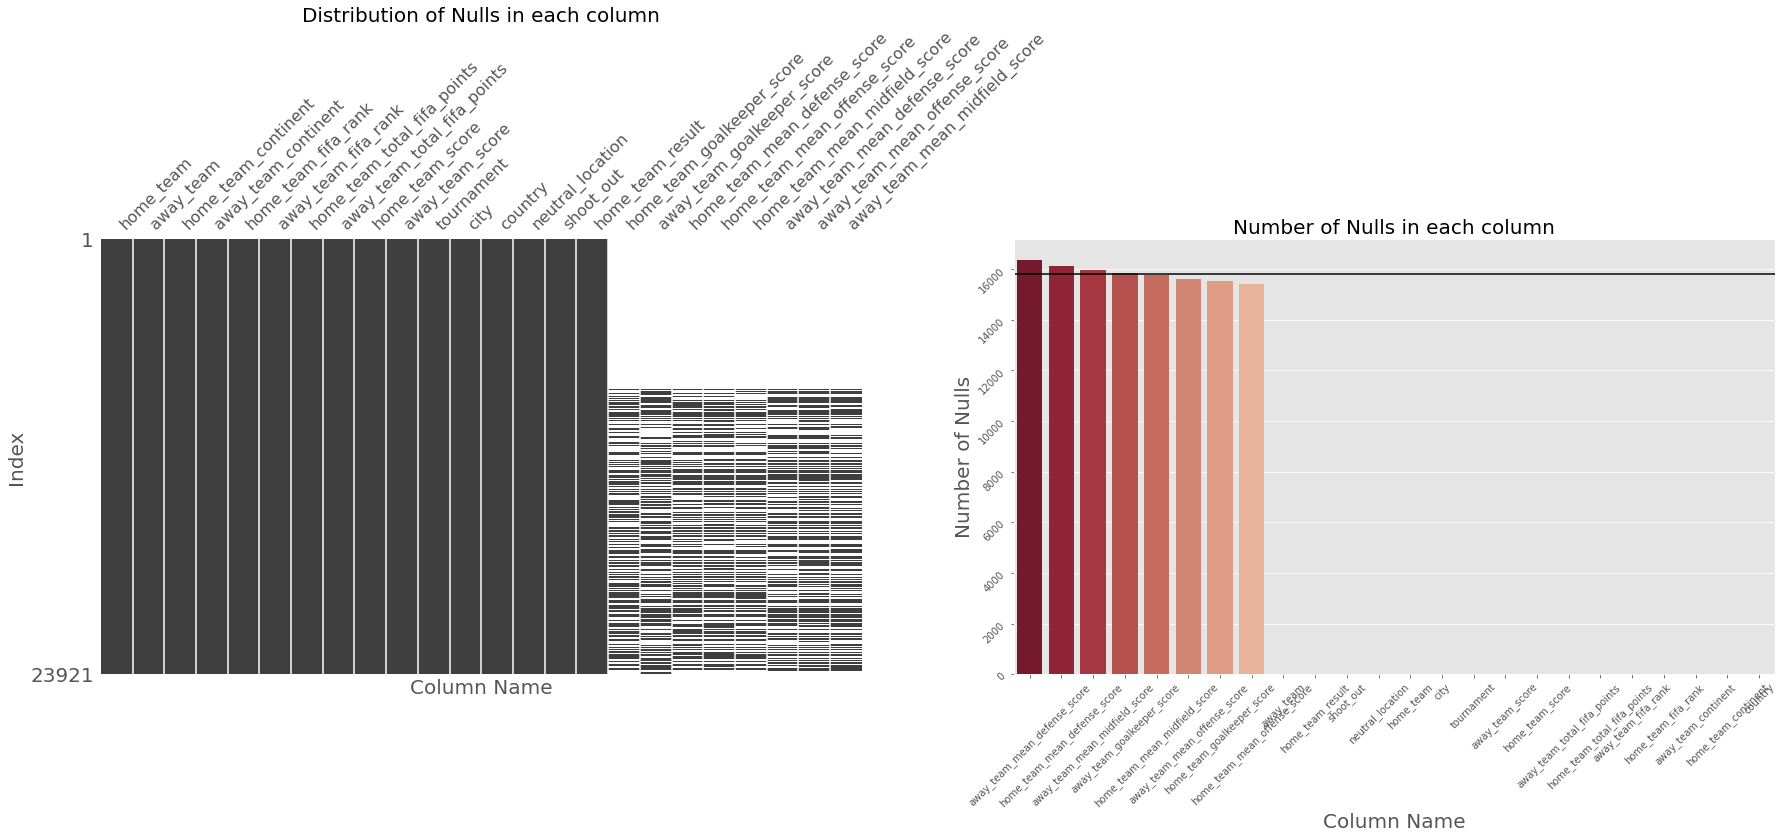

In [3]:
per_date = df.set_index('date').copy()
Nulls = per_date.isnull().sum().sort_values(ascending=False)
median = np.median(Nulls[Nulls>0].values)

fig, axs = plt.subplots(1, 2, figsize=(30, 8))
missingno.matrix(per_date, ax=axs[0])
axs[0].set_title('Distribution of Nulls in each column', size=20);axs[0].set_xlabel('Column Name', size=20);axs[0].set_ylabel('Index', size=20);

sns.barplot(x=Nulls.index, y=Nulls.values, ax=axs[1], palette='RdBu')
axs[1].tick_params(labelrotation=45)
axs[1].axhline(median, color='#000000')
axs[1].set_title('Number of Nulls in each column', size=20);axs[1].set_xlabel('Column Name', size=20);axs[1].set_ylabel('Number of Nulls', size=20);

<div style="background-color:#7F1431; color:#ffffff;
          padding:12px; margin-left:auto;margin-right:auto; border-radius:10px;">
<p style="font-weight:200px; font-size:30px; text-decoration: underline;
">Notes: </p>

<h3>
1. Nulls are in score columns only.<br>
2. It seems that there are some nulls that are not normally distributed (major nulls are in top rows).
</h3>
</div>

In [4]:
df['year'] = pd.to_datetime(df['date']).dt.year
nulls_per_year = pd.pivot_table(df, index=['year'], aggfunc=lambda x : x.isnull().mean() / 0.08).sum(1).sort_index()
fig = go.Figure(go.Scatter(x=nulls_per_year.index, y=nulls_per_year.values, mode='lines+markers'))
fig.update_layout(xaxis={'title':{'text':'year', 'font':{'size':20, 'color':'#7F1431'}}}, 
                  yaxis={'title':{'text':'Percentage of Nulls', 'font':{'size':20, 'color':'#7F1431'}}}, 
                  title={'text':"Percentage of nulls every year", 'font':{'size':25}})

### As expeced most nulls are in matches that were played before `2005`
#### This may be due to there wasn't these advanced analysis devices existing today.

### I will complete with these nulls for now, with taking these nulls in consideration while going on, in order to avoid losing much information.

<a id=duplicates></a>
<h1 style="color:#7f1431">Duplicates</h1>

In [5]:
print(f"Number of Duplicte rows in this dataset: {colored(df.duplicated().sum(), 'red')}")

Number of Duplicte rows in this dataset: 0


<a id=outliers></a>
<h1 style="color:#7f1431">Outliers</h1>

In [6]:
columns = df.select_dtypes(exclude='object').columns
n_cols = 2
n_rows = len(columns) // n_cols + 1

fig = make_subplots(rows=n_rows, cols=n_cols, subplot_titles=columns)

for i, col in enumerate(columns):
    fig.add_trace(go.Box(x=df[col], name=col),
                  row=i//n_cols+1, col=int(i%n_cols)+1)
    
fig.update_yaxes(visible=False, showticklabels=False)
fig.update_layout(height=1080)
fig.show()

In [7]:
fig = make_subplots(2, 2, subplot_titles=['Home team points distribution', 'Away team points distribution', 'Home team points per year', 'Away team points per year'])
trace1 = go.Histogram(x=df['home_team_total_fifa_points'], name='Home Team')
fig.add_trace(trace1, row=1, col=1)
trace2 = go.Histogram(x=df['away_team_total_fifa_points'], name='Away Team')
fig.add_trace(trace2, row=1, col=2)


home_team_points_per_year = df.groupby('year')['home_team_total_fifa_points'].mean()
away_team_points_per_year = df.groupby('year')['away_team_total_fifa_points'].mean()


trace1 = go.Bar(x=home_team_points_per_year.index, y=home_team_points_per_year.values, name='home')
fig.add_trace(trace1, 2, 1)
trace2 = go.Bar(x=away_team_points_per_year.index, y=away_team_points_per_year.values, name='away')
fig.add_trace(trace2, 2, 2)

> <font size=4>As I have mentioned, there are many nantion teams with zero FIFA points, and it seems these values are not true, All teams before 2011 have `zero` fifa points.

### So I am going to replace all zero values with weighted average values (large weight of points near to our record's year and low weight otherwise).

<h1 style="color:#7f1431">Note:</h1> 

#### I will use weighted average so I will use a gaussina kernel in order to give near points more weights, 
#### Gaussian kernel Equation:

$$ G(x) = \frac{1}{\sqrt{2\pi} \times \sigma} . e^{\frac{- x^2}{2\sigma^2}}$$

In [8]:
%%time
home_indices = df.loc[df.home_team_total_fifa_points>0].groupby('home_team').groups
away_indices = df.loc[df.away_team_total_fifa_points>0].groupby('away_team').groups

gaussian = lambda x : 1 / (np.sqrt(2*np.pi) * SIGMA) * np.exp(- np.power(x, 2) / (2*np.power(SIGMA, 2)))

def get_points(row_idx:float, home:bool=True) -> float:
    '''
    Args: 
        row_idx: index of row that have zero total fifa points.
        home: boolen flag to indicate whether to modify home or away team.
    
    Returns:
        weighted_points: new fifa point of this team.
        
    '''
    row = df.iloc[row_idx]
    year=row.year
    if home:
        team = row.home_team
        indices = home_indices
    else:
        team = row.away_team
        indices = away_indices
        
    years_points = df.loc[indices[team], ['year', 'home_team_total_fifa_points']].values.reshape(-1, 2)
    years = years_points[:, 0]
    points = years_points[:, 1]
    time_distance = years - year
    weights = gaussian(time_distance)
    weights = weights / np.sum(weights)
    weighted_points = weights * points
    return weighted_points.mean()


for year in range(2010, 1993, -1):
    home_zero_points_rows = pd.Series(df.loc[(df['home_team_total_fifa_points']==0).values & (df['year']==year).values].index)
    home = home_zero_points_rows.apply(get_points)
    df.loc[(df['home_team_total_fifa_points']==0).values & (df['year']==year).values, 'home_team_total_fifa_points'] = home.values
    
    away_zero_points_rows = pd.Series(df.loc[(df['away_team_total_fifa_points']==0).values & (df['year']==year).values].index)
    away = away_zero_points_rows.apply(lambda x : get_points(x, home=False))
    df.loc[(df['away_team_total_fifa_points']==0).values & (df['year']==year).values, 'away_team_total_fifa_points'] = away.values

CPU times: user 32.9 s, sys: 125 ms, total: 33 s
Wall time: 33 s


<a id='DA'></a>
<h1 style="background-color:#7F1431; font-weight:600; font-size:50px; text-align:center; padding:15px; color:#ffffff; border-radius:20px; margin:auto auto 50px auto">Data Analysis 🔬</h1>

<div style="background-color:#7F1431; color:#ffffff;
          padding:12px; margin-left:auto;margin-right:auto; border-radius:10px;">
<p style="font-weight:200px; font-size:30px;">
    It would be a mess if I would do these analysis using python (plotly), So I would rather move to tableau to have more more functionality and interactivity. </p>
    <h3> but first we need to do some preprocessing in this data to be ready for analysis</h3>
</div>

<h1 style="color:#7F1431;"> Prepare data for Analysis</h1>

> <font size=5>We can split our data in terms of analysis into two main categories: </font><br>
    <font size=3>
    1. per team analysis.<br>
    2. per match analysis.</font>

In [9]:
def mode(arr):
    srtd_lst, cnt = np.unique(arr, return_counts=True)
    return srtd_lst[np.argmax(cnt)]

# Home win | draw | lose
df['home_win'] = df['home_team_result'].apply(lambda x : x=='Win')
df['home_draw'] = df['home_team_result'].apply(lambda x : x=='Draw')
df['home_lose'] = df['home_team_result'].apply(lambda x : x=='Lose')

# per team table
per_team = pd.DataFrame(df.groupby('home_team')['home_win'].sum())
per_team['home_draw'] = df.groupby('home_team')['home_draw'].sum().values
per_team['home_loss'] = df.groupby('home_team')['home_lose'].sum().values

per_team['away_win']  = df.groupby('away_team')['home_lose'].sum().values
per_team['away_draw']  = df.groupby('away_team')['home_draw'].sum().values
per_team['away_win']  = df.groupby('away_team')['home_win'].sum().values

per_team['continent'] = df.groupby('home_team')['home_team_continent'].apply(mode).values

per_team['avg_FIFA_points'] = (df.groupby('home_team')['home_team_total_fifa_points'].mean().values + df.groupby('away_team')['away_team_total_fifa_points'].mean().values) / 2
per_team['median_FIFA_rank'] = df.groupby('home_team')['home_team_fifa_rank'].median().values

per_team['home_goal_scored'] = df.groupby(['home_team'])['home_team_score'].sum()
per_team['home_goal_conceded'] = df.groupby(['home_team'])['away_team_score'].sum()
per_team['away_goal_scored'] = df.groupby(['away_team'])['away_team_score'].sum()
per_team['away_goal_conceded'] = df.groupby(['away_team'])['home_team_score'].sum()

per_team.head()

,home_win,home_draw,home_loss,away_win,away_draw,continent,avg_FIFA_points,median_FIFA_rank,home_goal_scored,home_goal_conceded,away_goal_scored,away_goal_conceded
home_team,,,,,,,,,,,,
Afghanistan,16,8,12,33,17,Asia,275.744114,150.5,51,53,66,126
Albania,52,30,49,66,24,Europe,383.241391,78.0,156,143,98,176
Algeria,91,30,38,51,41,Africa,438.515518,55.0,297,143,149,162
American Samoa,3,1,13,13,0,Oceania,117.144991,203.0,17,94,5,119
Andorra,10,13,74,82,9,Europe,257.637685,156.0,36,199,24,275


<h1 style="color:#7f1431">For Visualizations: </h1>

1. [Per team visualizations at tableau public](https://public.tableau.com/app/profile/mahmoud6256/viz/per_team_vis/Dashboard1?publish=yes)<br>
2. [Per match visualizations at tableau public](https://public.tableau.com/app/profile/mahmoud6256/viz/per_match_vis/Dashboard1?publish=yes)

<h1 style="color:#7f1431">Per team Dashboard</h1>

<a href="https://ibb.co/3dvyRPp"><img src="https://i.ibb.co/vqhxXM3/per-team.png" alt="per-team" border="0"></a>

<h1 style="color:#7f1431">Per match Dashboard</h1>

<a href="https://ibb.co/Httkqz7"><img src="https://i.ibb.co/v33KkP1/per-match.png" alt="per-match" border="0"></a>

In [10]:
df.to_csv('matches.csv', index=False)

<h1>For Prediction: go to: </h1>

<a href="https://www.kaggle.com/code/mahmoudelhusseni/fifa-world-cup-winner-2022-part2" style="color:#7f1431; font-size:30px;">Part 2</a>